importing modules

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# loading dataset

In [2]:
df = pd.read_csv('black.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df = pd.read_csv('black.csv',dtype={"User_ID":"int8","Occupation":"int8","Marital_Status":"int8","Product_Category_1":"int8","Purchase":"int16",
                                   "Product_Category_2":"float32","Product_Category_3":"float32"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int8   
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int8   
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int8   
 8   Product_Category_1          550068 non-null  int8   
 9   Product_Category_2          376430 non-null  float32
 10  Product_Category_3          166821 non-null  float32
 11  Purchase                    550068 non-null  int16  
dtypes: float32(2), int16(1), int8(4), object(5)
memory usage: 28.3+ MB


In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,65,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,65,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,65,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,65,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,66,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
#to get the dimension
df.shape

(550068, 12)

In [7]:
#statistical values
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,-1.211832,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,73.308122,6.522660,0.491770,3.936211,5.088541,4.124302,5023.065394
min,-128.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,-64.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,-2.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,60.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,127.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
#to check the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int8   
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int8   
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int8   
 8   Product_Category_1          550068 non-null  int8   
 9   Product_Category_2          376430 non-null  float32
 10  Product_Category_3          166821 non-null  float32
 11  Purchase                    550068 non-null  int16  
dtypes: float32(2), int16(1), int8(4), object(5)
memory usage: 28.3+ MB


In [12]:
df.Product_ID=df.Product_ID.astype('category')
df.Gender =df.Gender .astype('category')
df.Age=df.Age.astype("category")
df.City_Category=df.City_Category.astype('category')
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int8    
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int8    
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  int8    
 8   Product_Category_1          550068 non-null  int8    
 9   Product_Category_2          376430 non-null  float32 
 10  Product_Category_3          166821 non-null  float32 
 11  Purchase                    550068 non-null  int16   
dtypes: category(5), float32(2), int16(1), int8(4)
memory usage

# Data pre-processing

In [104]:
#to check nullvalues
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [105]:
#to fill the missing values
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(),inplace=True)


In [106]:
df['Product_Category_3'].fillna(df['Product_Category_3'].mean(),inplace=True)


In [107]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Checking outliers

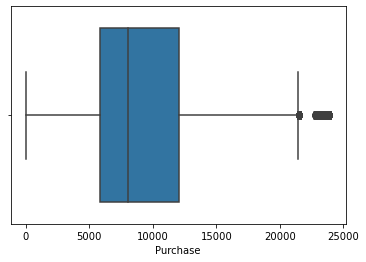

In [109]:
sns.boxplot(df['Purchase'])

Handling outliers

In [22]:
Q1=df.Purchase.quantile(0.25)
Q2=df.Purchase.quantile(0.75)
Q1,Q2

(5823.0, 12054.0)

In [23]:
IQR=Q2-Q1
IQR

6231.0

In [24]:
lower_limit=Q1-1.5*IQR
upper_limit=Q2+1.5*IQR
lower_limit,upper_limit

(-3523.5, 21400.5)

In [25]:
df1=df[(df.Purchase>lower_limit) & (df.Purchase<upper_limit)]
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,65,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,65,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,65,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,65,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,66,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


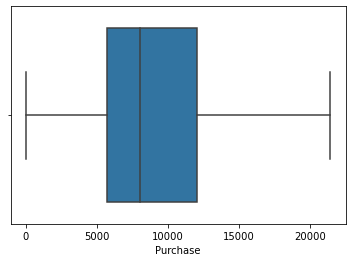

In [26]:
sns.boxplot(df1['Purchase'])

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     547391 non-null  int8    
 1   Product_ID                  547391 non-null  category
 2   Gender                      547391 non-null  category
 3   Age                         547391 non-null  category
 4   Occupation                  547391 non-null  int8    
 5   City_Category               547391 non-null  category
 6   Stay_In_Current_City_Years  547391 non-null  category
 7   Marital_Status              547391 non-null  int8    
 8   Product_Category_1          547391 non-null  int8    
 9   Product_Category_2          374165 non-null  float32 
 10  Product_Category_3          166180 non-null  float32 
 11  Purchase                    547391 non-null  int16   
dtypes: category(5), float32(2), int16(1), int8(4)
memory usage

Getting unique values

In [28]:
df1.apply(lambda x:len(x.unique()))

User_ID                         256
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      17078
dtype: int64

# Exploratory Data Analysis

In [119]:
df1['Gender'].value_counts()

M    412171
F    135220
Name: Gender, dtype: int64

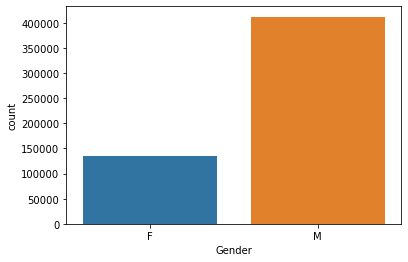

In [120]:
#distribution of gender
sns.countplot(df1['Gender'])
plt.show()

In [121]:
# checking dependency of gender on purchase

df1[['Gender', 'Purchase']].groupby('Gender').mean()


,Purchase
Gender,
F,8671.049039
M,9367.724355


In [122]:
df1['Age'].value_counts()

26-35    218661
36-45    109409
18-25     99334
46-50     45442
51-55     38191
55+       21322
0-17      15032
Name: Age, dtype: int64

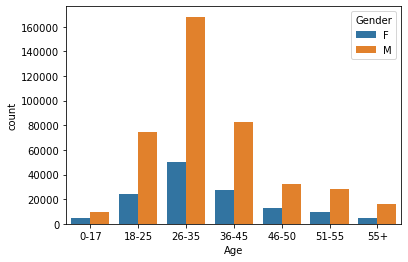

In [123]:
sns.countplot(x='Age',hue='Gender',data=df1)

In [124]:
# checking dependency of age on purchase
df1[['Age', 'Purchase']].groupby('Age').mean()

,Purchase
Age,
0-17,8867.447046
18-25,9124.031731
26-35,9193.469924
36-45,9254.202214
46-50,9128.985080
51-55,9423.121704
55+,9216.650220


In [125]:
df1["Occupation"].value_counts()

4     72040
0     69310
7     58875
1     47174
17    39855
20    33355
12    30995
14    27173
2     26435
16    25251
6     20261
3     17568
10    12888
5     12133
15    12086
11    11500
19     8412
13     7667
18     6595
9      6278
8      1540
Name: Occupation, dtype: int64

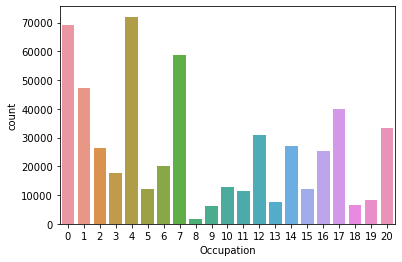

In [126]:

sns.countplot(df1['Occupation'])
plt.show()

In [127]:
# checking the dependency of occupation on purchase

df1[['Occupation', 'Purchase']].groupby('Occupation').mean()

,Purchase
Occupation,
0,9057.506291
1,8876.457053
2,8869.590505
3,9112.929019
4,9161.759189
5,9283.268854
6,9191.133261
7,9365.188025
8,9479.513636


In [128]:
df1["City_Category"].value_counts()

B    230114
C    170241
A    147036
Name: City_Category, dtype: int64

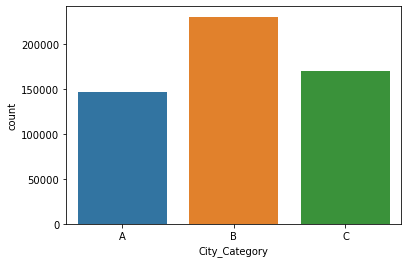

In [129]:
sns.countplot(df1['City_Category'])
plt.show()

In [130]:


df1[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8845.367393
B,9086.502707
C,9645.647300


In [131]:
df1["Stay_In_Current_City_Years"].value_counts()

1     192845
2     101384
3      94804
4+     84322
0      74036
Name: Stay_In_Current_City_Years, dtype: int64

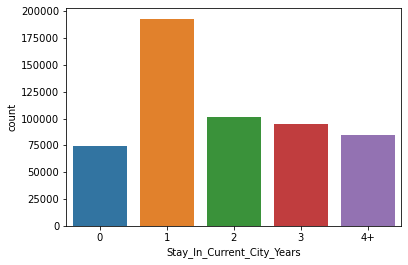

In [132]:
sns.countplot(df1["Stay_In_Current_City_Years"])
plt.show()

In [133]:
# checking the dependency of occupation on purchasing power

df1[["Stay_In_Current_City_Years", 'Purchase']].groupby('Stay_In_Current_City_Years').mean()

,Purchase
Stay_In_Current_City_Years,
0,9111.331555
1,9179.275916
2,9258.292028
3,9215.953451
4+,9208.837895


In [134]:
df1["Marital_Status"].value_counts()

0    323242
1    224149
Name: Marital_Status, dtype: int64

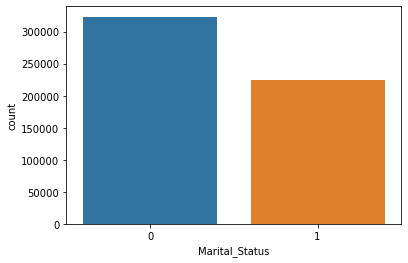

In [135]:

sns.countplot(df1['Marital_Status'])
plt.show()

In [136]:
# checking dependency of gender on purchase

df1[['Marital_Status', 'Purchase']].groupby('Marital_Status').mean()

,Purchase
Marital_Status,
0,9201.581849
1,9187.040076


In [137]:
df1.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [138]:
df1["Product_Category_1"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      5963
13      5549
12      3947
7       3721
18      3125
10      2850
20      2550
19      1603
14      1523
17       578
9        335
Name: Product_Category_1, dtype: int64

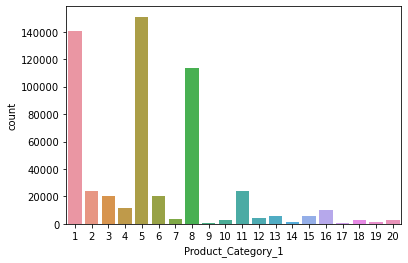

In [139]:
sns.countplot(df1['Product_Category_1'])
plt.show()

In [140]:
df1[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').mean()

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,13852.325373


In [141]:
df1["Product_Category_2"].value_counts()


9.842329     173226
8.000000      64088
14.000000     55001
2.000000      49217
16.000000     42749
15.000000     37139
5.000000      26235
4.000000      25677
6.000000      16466
11.000000     14134
17.000000     13230
13.000000      9685
9.000000       5693
12.000000      5528
10.000000      3043
3.000000       2884
18.000000      2770
7.000000        626
Name: Product_Category_2, dtype: int64

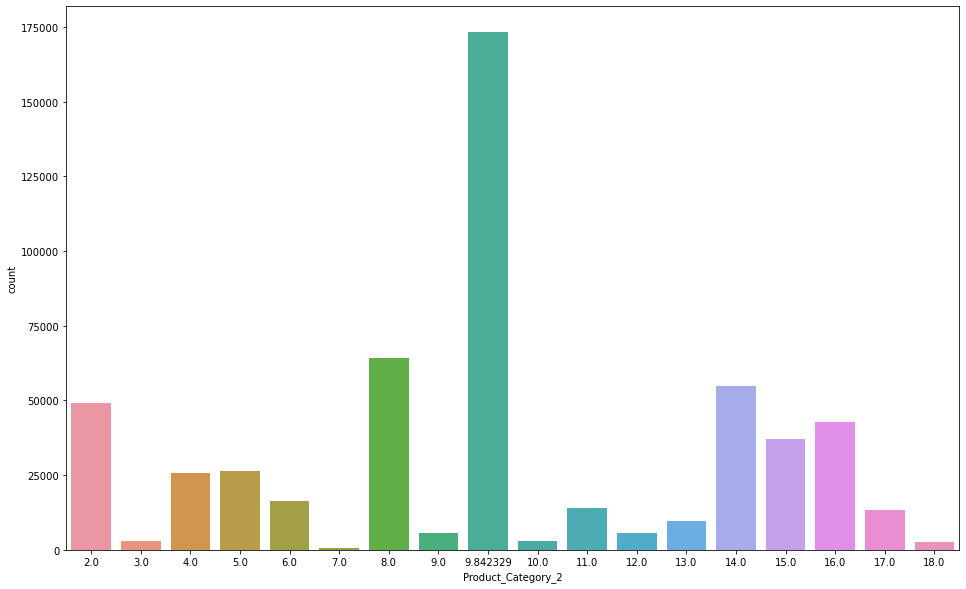

In [147]:
plt.figure(figsize=(16,10))
sns.countplot(df1['Product_Category_2'])
plt.show()


In [148]:
df1[['Product_Category_2', 'Purchase']].groupby('Product_Category_2').mean()

,Purchase
Product_Category_2,
2.000000,13619.356401
3.000000,11235.359570
4.000000,10215.192001
5.000000,9027.821574
6.000000,11503.551379
7.000000,6884.683706
8.000000,10273.259518
9.000000,7277.006851
9.842329,7482.722934


In [149]:
df1["Product_Category_3"].value_counts()


12.668243    381211
16.000000     32002
15.000000     28013
14.000000     18428
17.000000     16695
5.000000      16658
8.000000      12562
9.000000      11579
12.000000      9246
13.000000      5459
6.000000       4890
18.000000      4629
4.000000       1875
11.000000      1805
10.000000      1726
3.000000        613
Name: Product_Category_3, dtype: int64

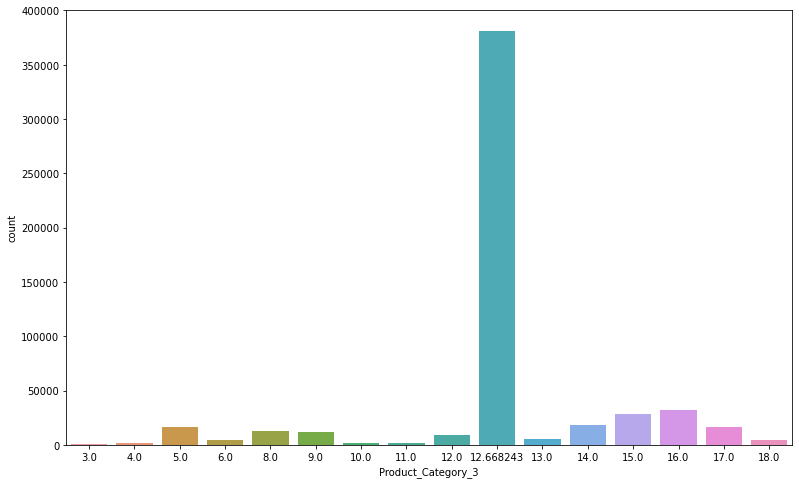

In [152]:
plt.figure(figsize=(13,8))
sns.countplot(df1['Product_Category_3'])
plt.show()


In [153]:
df1[['Product_Category_3', 'Purchase']].groupby('Product_Category_3').mean()

,Purchase
Product_Category_3,
3.000000,13939.696574
4.000000,9794.386667
5.000000,12117.786889
6.000000,13194.311043
8.000000,13024.918882
9.000000,10431.697210
10.000000,13505.813441
11.000000,12091.437673
12.000000,8715.512762


# Data pre-processing(continued...)

In [52]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [154]:
cols=['Gender','Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols:
    df1[col]=le.fit_transform(df1[col])
    

<ipython-input-154-a2b90083d77f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=le.fit_transform(df1[col])


In [155]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,65,P00069042,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,65,P00248942,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,65,P00087842,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,65,P00085442,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,66,P00285442,1,6,16,2,4,0,8,9.842329,12.668243,7969


In [156]:
corr_matrix=df1.corr()
corr_matrix


,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,0.021416,0.016006,-0.011154,-0.004628,0.018380,-0.017797,0.002224,0.003694,0.002335,0.000373
Gender,0.021416,1.000000,-0.004006,0.117155,-0.004523,0.014570,-0.011425,-0.046426,-0.015660,0.014953,0.060837
Age,0.016006,-0.004006,1.000000,0.091625,0.122545,-0.004585,0.311756,0.060069,0.044345,0.030829,0.012357
Occupation,-0.011154,0.117155,0.091625,1.000000,0.034684,0.030100,0.024128,-0.008180,-0.000589,0.007144,0.020428
City_Category,-0.004628,-0.004523,0.122545,0.034684,1.000000,0.019924,0.039533,-0.014832,-0.010156,-0.001342,0.062341
Stay_In_Current_City_Years,0.018380,0.014570,-0.004585,0.030100,0.019924,1.000000,-0.012788,-0.004210,-0.001339,0.001205,0.005677
Marital_Status,-0.017797,-0.011425,0.311756,0.024128,0.039533,-0.012788,1.000000,0.019591,0.012270,0.010572,-0.001448
Product_Category_1,0.002224,-0.046426,0.060069,-0.008180,-0.014832,-0.004210,0.019591,1.000000,0.370551,0.081148,-0.370128
Product_Category_2,0.003694,-0.015660,0.044345,-0.000589,-0.010156,-0.001339,0.012270,0.370551,1.000000,0.319908,-0.196405
Product_Category_3,0.002335,0.014953,0.030829,0.007144,-0.001342,0.001205,0.010572,0.081148,0.319908,1.000000,-0.017489


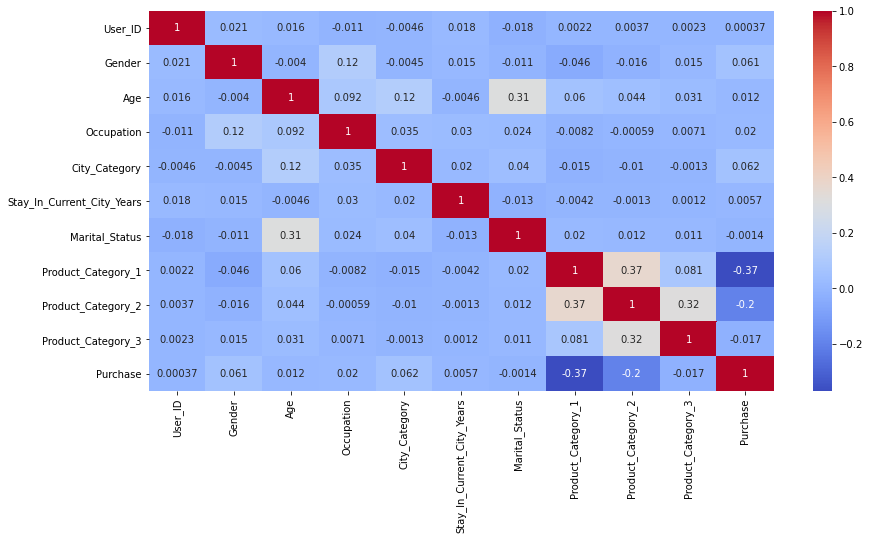

In [157]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [158]:
corr_purchase=df1.corr()["Purchase"].sort_values()
corr_purchase

Product_Category_1           -0.370128
Product_Category_2           -0.196405
Product_Category_3           -0.017489
Marital_Status               -0.001448
User_ID                       0.000373
Stay_In_Current_City_Years    0.005677
Age                           0.012357
Occupation                    0.020428
Gender                        0.060837
City_Category                 0.062341
Purchase                      1.000000
Name: Purchase, dtype: float64

In [160]:
#dropping columns
df1.drop(["Product_ID","User_ID","Marital_Status","City_Category","Product_Category_3","Gender"],axis=1,inplace=True)

C:\Users\SSB\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [161]:
df1.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Purchase
0,0,10,2,3,9.842329,8370
1,0,10,2,1,6.000000,15200
2,0,10,2,12,9.842329,1422
3,0,10,2,12,14.000000,1057
4,6,16,4,8,9.842329,7969


In [162]:
df.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [176]:
df1.rename(columns={"Stay_In_Current_City_Years":"SICY","Product_Category_1":"PC1","Product_Category_2":"PC2"},inplace=True)

In [177]:
df1.head()

,Age,Occupation,SICY,PC1,PC2,Purchase
0,0,10,2,3,9.842329,8370
1,0,10,2,1,6.000000,15200
2,0,10,2,12,9.842329,1422
3,0,10,2,12,14.000000,1057
4,6,16,4,8,9.842329,7969


In [180]:
X=df1[["Age","Occupation","SICY","PC1","PC2"]]
y=df1['Purchase']

In [181]:
print(X.shape)
print(y.shape)

(547391, 5)
(547391,)


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

In [174]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(437912, 5)
(437912,)
(109479, 5)
(109479,)


Feature Scalling

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaler=sc.fit(X)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Data Modelling

Linear Regression

In [188]:
lr=LinearRegression()
fit1= lr.fit(X_train,y_train)
print("Accuracy Score of LinearRegression on train set",fit1.score(X_train,y_train)*100)
print("Accuracy Score of LinearRegression on test set",fit1.score(X_test,y_test)*100)
y_pred_lin_reg = fit1.predict(X_test)

Accuracy Score of LinearRegression on train set 14.263250997382059
Accuracy Score of LinearRegression on test set 14.239921281115253


KNN

In [189]:
knc=KNeighborsRegressor()
fit2=knc.fit(X_train,y_train)
print("Accuracy Score of KNN on train set",fit2.score(X_train,y_train)*100)
print("Accuracy Score of KNN on test set",fit2.score(X_test,y_test)*100)
y_pred_knn = fit2.predict(X_test)

Accuracy Score of KNN on train set 60.72965125036207
Accuracy Score of KNN on test set 57.49872393487519


Random Forest

In [190]:
rfr=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=10,random_state=5)
fit3=rfr.fit(X_train,y_train)
print("Accuracy Score of Random Forests on train set",fit3.score(X_train,y_train)*100)
print("Accuracy Score of Random Forests on test set",fit3.score(X_test,y_test)*100)
y_pred_ran_for = fit3.predict(X_test)

Accuracy Score of Random Forests on train set 64.29571154499465
Accuracy Score of Random Forests on test set 64.20149397253118


Decision Tree

In [192]:
dtr= DecisionTreeRegressor(criterion="mse",max_depth=10,random_state=8)
fit4=dtr.fit(X_train,y_train)
print("Accuracy Score of Decision Tree on train set",fit4.score(X_train,y_train)*100)
print("Accuracy Score of Decision Tree on test set",fit4.score(X_test,y_test)*100)
y_pred_dec = fit4.predict(X_test)

Accuracy Score of Decision Tree on train set 64.05794553753287
Accuracy Score of Decision Tree on test set 63.969522673051195


XG Boost Regressor

In [194]:
xgb=XGBRegressor()
fit6=xgb.fit(X_train,y_train)
print("Accuracy Score of XG Boost Regressor on train set",fit6.score(X_train,y_train)*100)
print("Accuracy Score of XG Boost Regressor on test set",fit6.score(X_test,y_test)*100)
y_pred_xgb = fit6.predict(X_test)

Accuracy Score of XG Boost Regressor on train set 64.95216662689123
Accuracy Score of XG Boost Regressor on test set 64.71757229349204


# Model Evaluation

In [195]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_lin_reg)))
print("R2 score:", r2_score(y_test, y_pred_lin_reg))

Linear Regression: 
RMSE: 4582.058510997117
R2 score: 0.14239921281115253


In [196]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("R2 score:", r2_score(y_test, y_pred_knn))

KNN regression: 
RMSE: 3225.663276914
R2 score: 0.5749872393487518


In [197]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_ran_for)))
print("R2 score:", r2_score(y_test, y_pred_ran_for))

Random forest regression: 
RMSE: 2960.4006882315352
R2 score: 0.6420149397253118


In [198]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_dec)))
print("R2 score:", r2_score(y_test, y_pred_dec))

Decision tree regression: 
RMSE: 2969.976773600945
R2 score: 0.6396952267305119


In [199]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 score:", r2_score(y_test, y_pred_xgb))

XGB regression: 
RMSE: 2938.9844
R2 score: 0.6471757229349204
